In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/ARS

/content/drive/MyDrive/Colab Notebooks/ARS


In [3]:
#from datasets import load_dataset
#ds = load_dataset("ahmedheakl/resume-atlas")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
resumeDataSet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ARS/R_Data2.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Text,cleaned_resume
0,Accountant,education omba executive leadership university...,
1,Accountant,howard gerrard accountant deyjobcom birmingham...,
2,Accountant,kevin frank senior accountant inforesumekraftc...,
3,Accountant,place birth nationality olivia ogilvy accounta...,
4,Accountant,stephen greet cpa senior accountant 9 year exp...,


In [6]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        13389 non-null  object
 1   Text            13389 non-null  object
 2   cleaned_resume  13389 non-null  object
dtypes: object(3)
memory usage: 313.9+ KB


In [7]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Accountant' 'Advocate' 'Agriculture' 'Apparel' 'Architecture' 'Arts'
 'Automobile' 'Aviation' 'Banking' 'Blockchain' 'BPO'
 'Building and Construction' 'Business Analyst' 'Civil Engineer'
 'Consultant' 'Data Science' 'Database' 'Designing' 'DevOps'
 'Digital Media' 'DotNet Developer' 'Education' 'Electrical Engineering'
 'ETL Developer' 'Finance' 'Food and Beverages' 'Health and Fitness'
 'Human Resources' 'Information Technology' 'Java Developer' 'Management'
 'Mechanical Engineer' 'Network Security Engineer' 'Operations Manager'
 'PMO' 'Public Relations' 'Python Developer' 'React Developer' 'Sales'
 'SAP Developer' 'SQL Developer' 'Testing' 'Web Designing']


In [8]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Education                    410
Electrical Engineering       384
Mechanical Engineer          384
Consultant                   368
Sales                        364
Civil Engineer               364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Operations Manager           345
Building and Construction    345
Testing                      344
Architecture                 344
Aviation                     340
Business Analyst             340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313

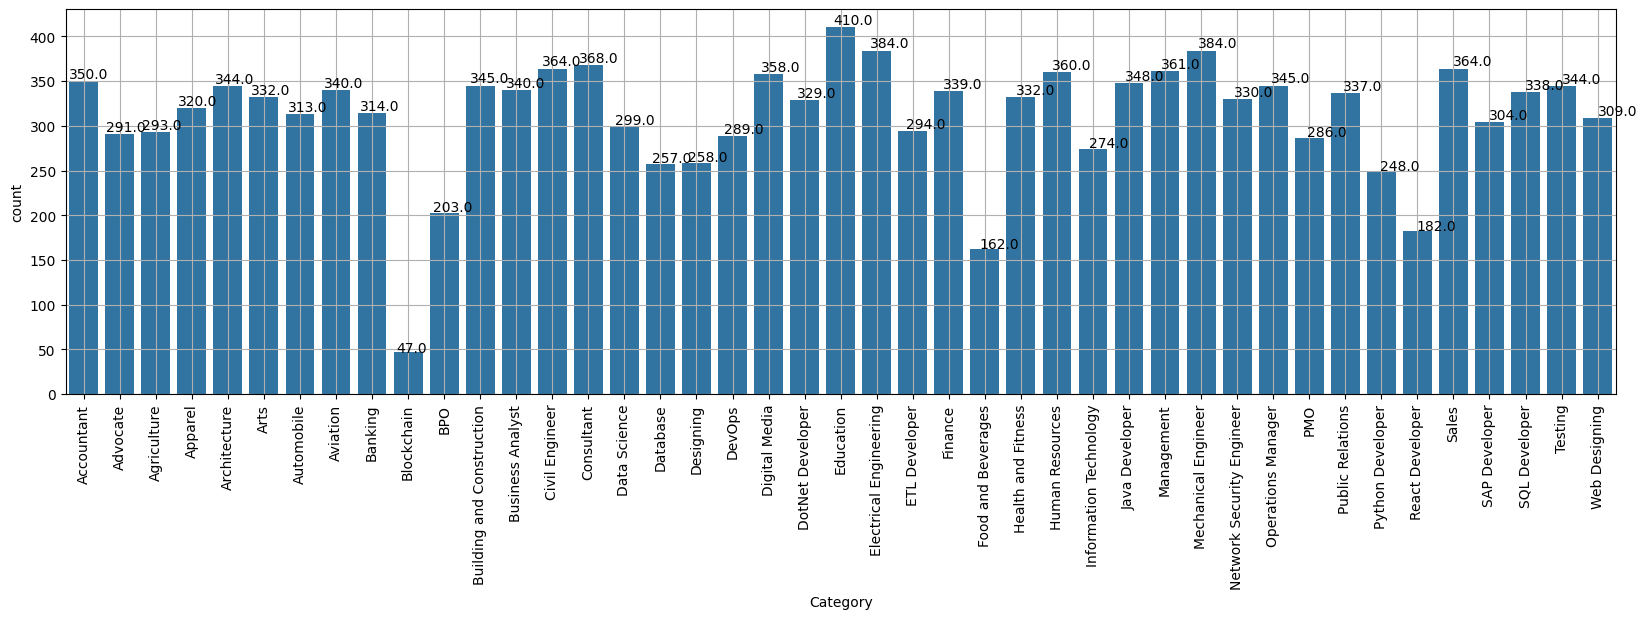

In [9]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


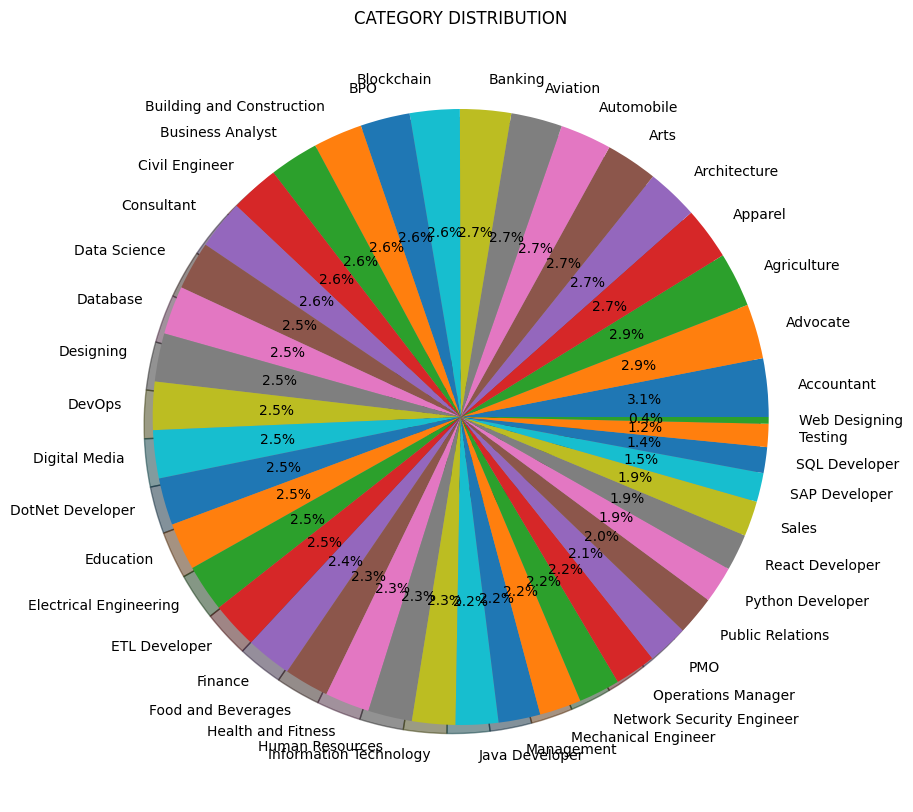

In [10]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()


In [11]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Text.apply(lambda x: cleanResume(x))

In [12]:
resumeDataSet.head()

,Category,Text,cleaned_resume
0,Accountant,education omba executive leadership university...,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...,howard gerrard a ountant deyjobcom birmingham ...
2,Accountant,kevin frank senior accountant inforesumekraftc...,kevin frank senior a ountant inforesumekraftco...
3,Accountant,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy a ountan...
4,Accountant,stephen greet cpa senior accountant 9 year exp...,stephen greet cpa senior a ountant 9 year expe...


In [13]:
resumeDataSet_d=resumeDataSet.copy()

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Text'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('management', 42463), ('data', 38991), ('experience', 33096), ('business', 31653), ('skills', 31057), ('team', 29058), ('customer', 27312), ('using', 27183), ('project', 26660), ('development', 26581), ('new', 25602), ('work', 23545), ('design', 21791), ('service', 20006), ('sales', 19834), ('state', 18393), ('support', 18223), ('developed', 17916), ('systems', 17510), ('education', 17386), ('training', 16815), ('system', 16496), ('performance', 16278), ('sql', 15739), ('professional', 15667), ('services', 15622), ('city', 15080), ('software', 14521), ('database', 14211), ('information', 14182), ('including', 13938), ('university', 13736), ('projects', 13678), ('customers', 13652), ('company', 13415), ('process', 13282), ('worked', 13215), ('procedures', 13160), ('analysis', 13068), ('operations', 13012), ('testing', 12977), ('requirements', 12925), ('maintained', 12911), ('reports', 12878), ('issues', 12774), ('server', 12510), ('web', 12303), ('quality', 12212), ('manager', 12170),

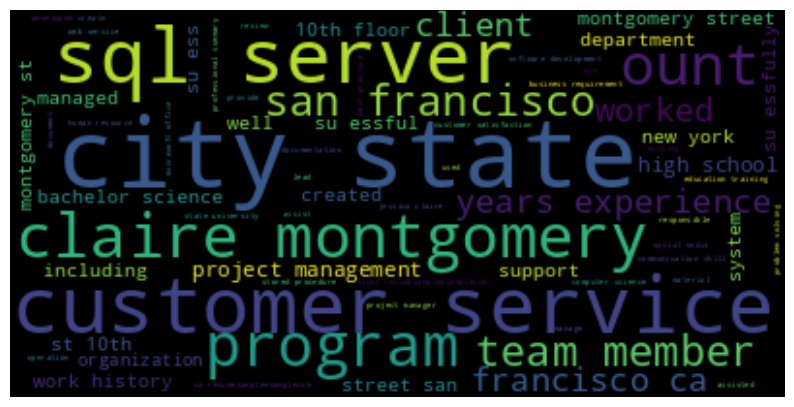

In [16]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [18]:
resumeDataSet.head()

,Category,Text,cleaned_resume
0,0,education omba executive leadership university...,education omba executive leadership university...
1,0,howard gerrard accountant deyjobcom birmingham...,howard gerrard a ountant deyjobcom birmingham ...
2,0,kevin frank senior accountant inforesumekraftc...,kevin frank senior a ountant inforesumekraftco...
3,0,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy a ountan...
4,0,stephen greet cpa senior accountant 9 year exp...,stephen greet cpa senior a ountant 9 year expe...


In [19]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

,count
Category,
Education,410
Electrical Engineering,384
Mechanical Engineer,384
Consultant,368
Sales,364
Civil Engineer,364
Management,361
Human Resources,360
Digital Media,358


In [20]:
del resumeDataSet_d #clearing the space occupied

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preprocessing text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(resumeDataSet['cleaned_resume'])
X = tokenizer.texts_to_sequences(resumeDataSet['cleaned_resume'])
X = pad_sequences(X, maxlen=300)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(resumeDataSet['Category'])
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))  # Embedding layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First Bidirectional LSTM
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Bidirectional(LSTM(64)))  # Second Bidirectional LSTM
model.add(Dense(128, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Validation Accuracy: {accuracy:.2f}')


Epoch 1/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.0331 - loss: 3.7433 - val_accuracy: 0.0527 - val_loss: 3.3968
Epoch 2/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.0640 - loss: 3.4146 - val_accuracy: 0.0833 - val_loss: 3.2182
Epoch 3/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.0822 - loss: 3.1907 - val_accuracy: 0.1441 - val_loss: 2.8738
Epoch 4/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.1523 - loss: 2.8463 - val_accuracy: 0.2199 - val_loss: 2.6071
Epoch 5/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.2142 - loss: 2.5183 - val_accuracy: 0.2457 - val_loss: 2.4912
Epoch 6/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.2909 - loss: 2.2547 - val_accuracy: 0.3312 - val_loss: 2.2287
Epoch 7/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.3585 - loss: 1.9866 - val_accuracy: 0.3839 - val_loss: 2.0714
Epoch 8/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.4400 - loss: 1.7370 - 

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6093 - loss: 2.7874
Accuracy: 0.62


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


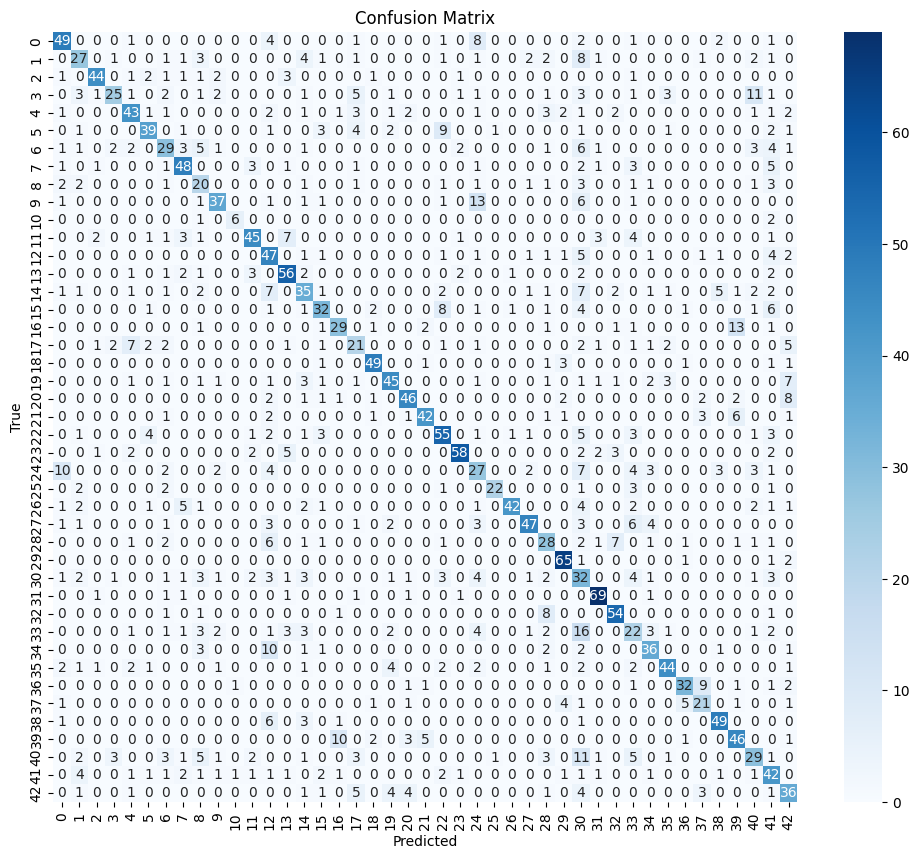

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        70
           1       0.53      0.47      0.50        58
           2       0.85      0.75      0.79        59
           3       0.74      0.39      0.51        64
           4       0.65      0.62      0.64        69
           5       0.74      0.59      0.66        66
           6       0.50      0.46      0.48        63
           7       0.69      0.71      0.70        68
           8       0.36      0.50      0.42        40
           9       0.73      0.59      0.65        63
          10       0.75      0.67      0.71         9
          11       0.76      0.65      0.70        69
          12       0.45      0.69      0.55        68
          13       0.71      0.77      0.74        73
          14       0.51      0.47      0.49        74
          15       0.60      0.53      0.57        60
          16       0.66      0.57      0.61        51
    

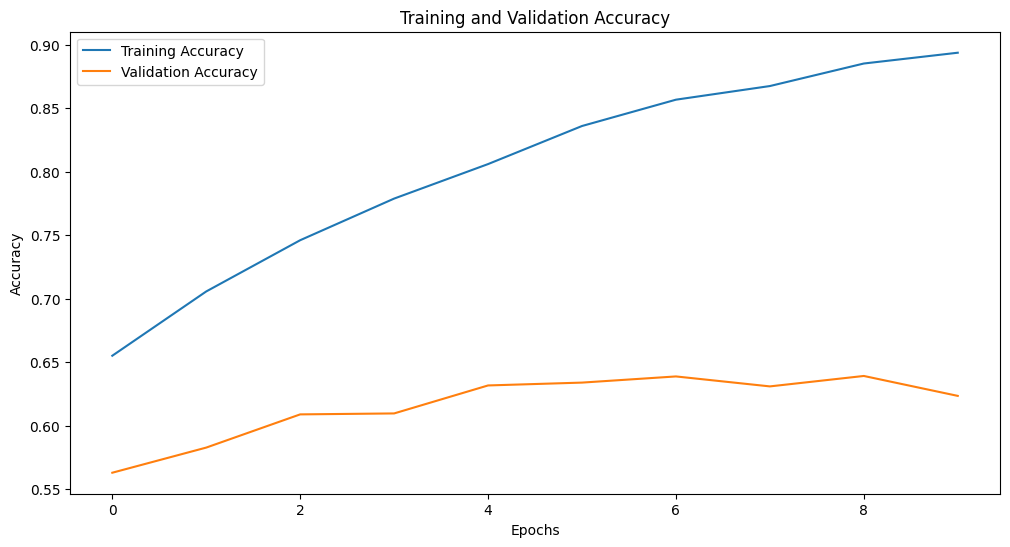

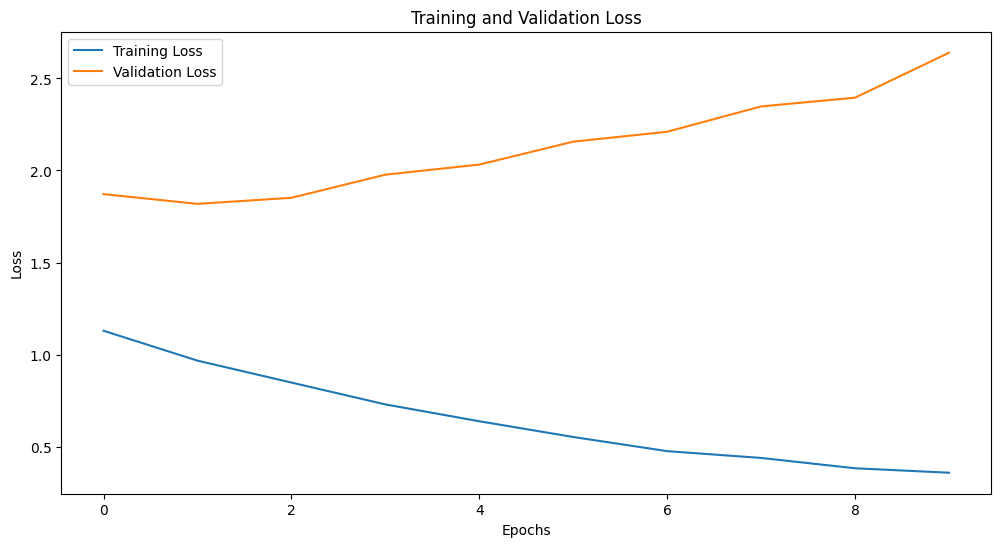

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_labels = label_encoder.classes_
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels.astype(str)))

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming resumeDataSet is already loaded and cleaned
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

# TF-IDF Vectorization
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("Feature extraction completed .....")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    WordFeatures, requiredTarget, random_state=42, test_size=0.2,
    shuffle=True, stratify=requiredTarget)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# --- Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(f'Accuracy of Logistic Regression on test set: {accuracy_score(y_test, y_pred_logreg):.2f}')

# --- Support Vector Machine (SVM) ---
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f'Accuracy of SVM on test set: {accuracy_score(y_test, y_pred_svm):.2f}')

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Accuracy of Random Forest on test set: {accuracy_score(y_test, y_pred_rf):.2f}')

# --- Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f'Accuracy of Naive Bayes on test set: {accuracy_score(y_test, y_pred_nb):.2f}')

# --- XGBoost ---
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f'Accuracy of XGBoost on test set: {accuracy_score(y_test, y_pred_xgb):.2f}')


Feature extraction completed .....
Training data shape: (10711, 126869)
Test data shape: (2678, 126869)
Accuracy of Logistic Regression on test set: 0.79
Accuracy of SVM on test set: 0.81
Accuracy of Random Forest on test set: 0.77
Accuracy of Naive Bayes on test set: 0.62
Accuracy of XGBoost on test set: 0.83


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(10711, 126869)
(2678, 126869)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.76
Accuracy of KNeighbors Classifier on test set:     0.66


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        70
           1       0.79      0.59      0.67        58
           2       0.78      0.64      0.70        59
           3       0.70      0.84      0.77        64
           4       0.77      0.48      0.59        69
           5       0.70      0.56      0.62        66
           6       0.57      0.49      0.53        63
           7       0.75      0.74      0.74        68
           8       0.58      0.28      0.37        40
           9       0.69      0.75      0.72        63
          10       0.67      0.44      0.53         9
          11       0.75      0.74      0.74        69
          12       0.62      0.56      0.59        68
          13       0.76      0.74      0.75        73
          14       0.42      0.22      0.29        74
          15       0.68      0.68      0.